# Geographical Visualizations with Python

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

## Import Datasets

In [2]:
# Creating path
path = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset'

# Importing dataset
df = pd.read_csv(os.path.join(path,'02 Data Profile', 'heart_attack_prediction_dataset_clean_relations.csv'))

In [3]:
# Import '.json' file with info about world countries 

world_geo = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\world-countries.json'

##  Wrangle Data

In [4]:
# check JSON file content:

f = open(r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\world-countries.json',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [5]:
# check data frame
df.head

<bound method NDFrame.head of      Patient ID  Age  Gender  Cholesterol Level Blood Pressure  Heart Rate  \
0       BMW7812   67    Male                208         158/88          72   
1       CZE1114   21    Male                389         165/93          98   
2       BNI9906   21  Female                324         174/99          72   
3       JLN3497   84    Male                383        163/100          73   
4       GFO8847   66    Male                318          91/88          93   
...         ...  ...     ...                ...            ...         ...   
8758    MSV9918   60    Male                121          94/76          61   
8759    QSV6764   28  Female                120        157/102          73   
8760    XKA5925   47    Male                250         161/75         105   
8761    EPE6801   36    Male                178         119/67          60   
8762    ZWN9666   25  Female                356         138/67          75   

      Diabetes  Family Heart Prob

In [6]:
# Dropping not necessary columns 

for col in ['Patient ID', 'Blood Pressure', 'Diabetes', 'Family Heart Problems','Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk', 'Age category', 'Exercise HPW category']:
    if col in df.columns:
        df.drop(columns=col, inplace=True)

In [7]:
# Check received shape and columns
df.shape, df.columns.tolist()

((8763, 10),
 ['Age',
  'Gender',
  'Cholesterol Level',
  'Heart Rate',
  'Income',
  'Body Mass Index',
  'Triglyceride Levels',
  'Country',
  'Continent',
  'Hemisphere'])

In [8]:
# Check for missing values
df.isnull().sum()

Age                    0
Gender                 0
Cholesterol Level      0
Heart Rate             0
Income                 0
Body Mass Index        0
Triglyceride Levels    0
Country                0
Continent              0
Hemisphere             0
dtype: int64

In [9]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicates found.

In [10]:
df.dtypes

Age                      int64
Gender                  object
Cholesterol Level        int64
Heart Rate               int64
Income                   int64
Body Mass Index        float64
Triglyceride Levels      int64
Country                 object
Continent               object
Hemisphere              object
dtype: object

<Axes: xlabel='Heart Rate', ylabel='Count'>

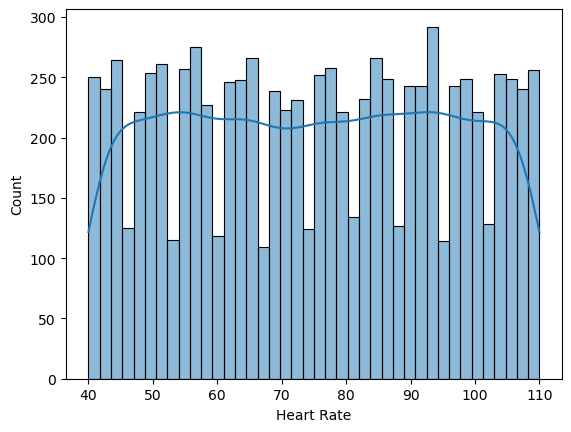

In [11]:
# check for extreme values in 'Heart Rate' column
sns.histplot(df['Heart Rate'], bins=40, kde=True)

<Axes: xlabel='Cholesterol Level', ylabel='Count'>

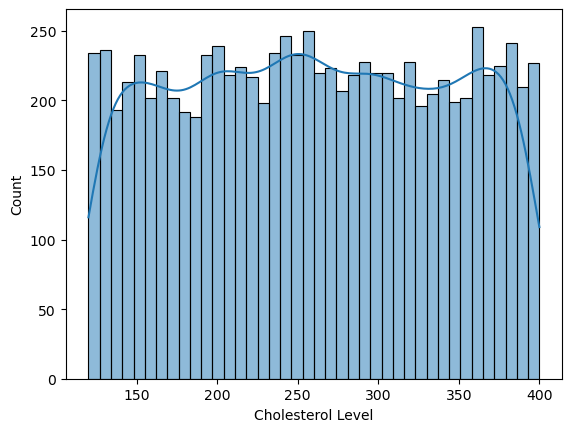

In [12]:
# check for extreme values in 'Cholesterol Level' column
sns.histplot(df['Cholesterol Level'], bins=40, kde=True)

<Axes: xlabel='Body Mass Index', ylabel='Count'>

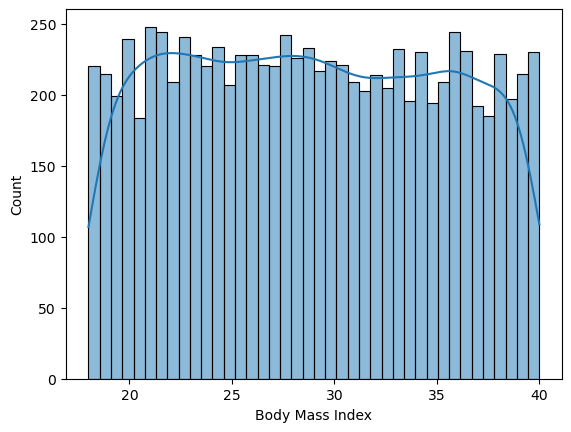

In [13]:
# check for extreme values in 'Body Mass Index' column
sns.histplot(df['Body Mass Index'], bins=40, kde=True)

In [14]:
# Reload JSON from Windows path to ensure it's parsed as a dict
import json
json_path = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\world-countries.json'
with open(json_path, 'r') as f:
    world_geo = json.load(f)

In [15]:
# Cheking sample values
print("Sample countries in data:", df['Country'].unique()[:10])
print("Sample names in JSON:", [feat['properties']['name'] for feat in world_geo['features'][:10]])

Sample countries in data: ['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam']
Sample names in JSON: ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antarctica', 'French Southern and Antarctic Lands', 'Australia', 'Austria']


## Plotting a Choropleth Map

### Choropleth Map 1 - 'Average Heart Rate by Country'

In [16]:
# Compute average Hear Rate per Country

country_ratings = (
    df.groupby('Country')['Heart Rate']
      .mean()
      .reset_index()
      .rename(columns={'Heart Rate':'Heart Rate Avg'})
)

In [17]:
# checking 
country_ratings.head()

,Country,Heart Rate Avg
0,Argentina,75.171975
1,Australia,75.714922
2,Brazil,75.240260
3,Canada,75.197727
4,China,75.376147


In [18]:
# Initialize Folium map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layer
folium.Choropleth(
    geo_data=world_geo,
    data=country_ratings,
    columns=['Country', 'Heart Rate Avg'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color='white',
    legend_name='Average Heart Rate by Country'
).add_to(map)

folium.LayerControl().add_to(map)

# Show map
map

In [19]:
from folium.features import GeoJsonTooltip

### Make a map with visible Country Name

In [20]:
# Initialize Folium map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layer (handles country coloring)
folium.Choropleth(
    geo_data=world_geo,
    data=country_ratings,
    columns=['Country', 'Heart Rate Avg'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2, 
    nan_fill_color='white',
    legend_name='Average Heart Rate by Country'
).add_to(map)

# Add GeoJson layer for thin grey borders and tooltips
folium.GeoJson(
    world_geo,
    name="Country Borders",
    style_function=lambda feature: {
        'color': 'grey',       # thin grey borders
        'weight': 0.5,
        'fillOpacity': 0       # transparent fill so it doesn't override choropleth
    },
    tooltip=GeoJsonTooltip(
        fields=["name"],
        aliases=["Country:"],
        labels=True,
        sticky=False
    )
).add_to(map)

# Add layer control
folium.LayerControl().add_to(map)

# Show map
map

### Choropleth Map 2 - 'Average Cholesterol Level by Country'

In [21]:
# Compute average Cholesterol Level per Country

country_cholesterol = (
    df.groupby('Country')['Cholesterol Level']
      .mean()
      .reset_index()
      .rename(columns={'Cholesterol Level':'Cholesterol Level Avg'})
)

In [22]:
# checking 
country_cholesterol.head()

,Country,Cholesterol Level Avg
0,Argentina,261.520170
1,Australia,258.997773
2,Brazil,257.270563
3,Canada,256.847727
4,China,258.009174


In [25]:
print(country_cholesterol.isnull().sum())

Country                  0
Cholesterol Level Avg    0
dtype: int64


In [23]:
# Initialize Folium map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layer (handles country coloring)
folium.Choropleth(
    geo_data=world_geo,
    data=country_cholesterol,
    columns=['Country', 'Cholesterol Level Avg'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2, 
    nan_fill_color='white',
    legend_name='Average Cholesterol Level by Country'
).add_to(map)

# Add GeoJson layer for thin grey borders and tooltips
folium.GeoJson(
    world_geo,
    name="Country Borders",
    style_function=lambda feature: {
        'color': 'grey',       # thin grey borders
        'weight': 0.5,
        'fillOpacity': 0       # transparent fill so it doesn't override choropleth
    },
    tooltip=GeoJsonTooltip(
        fields=["name"],
        aliases=["Country:"],
        labels=True,
        sticky=False
    )
).add_to(map)

# Add layer control
folium.LayerControl().add_to(map)

# Show map
map

In [24]:
# Define a path
map_path = r"C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\country_cholesterol.csv"

# Save the cleaned dataset
country_cholesterol.to_csv(map_path, index=False)

print(f"New data saved to: {map_path}")

New data saved to: C:\Users\ZenBook\Heart Attack Risk Prediction Dataset\02 Data Profile\country_cholesterol.csv


### Choropleth Map 3 - 'Average Body Mass Index by Country'

In [24]:
# Compute average Body Mass Index per Country

country_cholesterol = (
    df.groupby('Country')['Body Mass Index']
      .mean()
      .reset_index()
      .rename(columns={'Body Mass Index':'Body Mass Index Avg'})
)

In [25]:
# checking 
country_cholesterol.head()

,Country,Body Mass Index Avg
0,Argentina,28.794898
1,Australia,29.080740
2,Brazil,28.902022
3,Canada,29.052191
4,China,28.861312


In [26]:
# Initialize Folium map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add choropleth layer (handles country coloring)
folium.Choropleth(
    geo_data=world_geo,
    data=country_cholesterol,
    columns=['Country', 'Body Mass Index Avg'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2, 
    nan_fill_color='white',
    legend_name='Average Body Mass Index by Country'
).add_to(map)

# Add GeoJson layer for thin grey borders and tooltips
folium.GeoJson(
    world_geo,
    name="Country Borders",
    style_function=lambda feature: {
        'color': 'grey',       # thin grey borders
        'weight': 0.5,
        'fillOpacity': 0       # transparent fill so it doesn't override choropleth
    },
    tooltip=GeoJsonTooltip(
        fields=["name"],
        aliases=["Country:"],
        labels=True,
        sticky=False
    )
).add_to(map)

# Add layer control
folium.LayerControl().add_to(map)

# Show map
map

## Answer to questions

All these maps shows how average Heart Rate, Cholesterol Level and Body Mass Index varying through different countries in the Word.
Darker shades indicate higher average values.

Interpretations:
'Average Heart Rate by Country' - South Africa, France and New Zealand have the highest average heart rate in the World according to analysed data.
'Average Cholesterol Level by Country' - France and Vietnam have the highest average Cholesterol Level.
'Average Body Mass Index by Country' - Germany, South Africa, South Corea and Australia have the highest BMI in the World.

New Questions:
1. Do countries with high average Heart Rate/Cholesterol Level/BMI also exhibit higher Heart Attack Risk?
2. Are individuals from countries with high average Cholesterol Level more likely to report previous heart problems or medication use?
3. Do countries with high heart rate also have high cholesterol and BMI?